In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/winemag-data-130k-v2.csv', index_col=0)

In [1]:
!unzip winemag-data-130k-v2.csv.zip

Archive:  winemag-data-130k-v2.csv.zip
  inflating: winemag-data-130k-v2.csv  
  inflating: wine_analysis.html      


In [5]:
df.head()


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
unique_countries = df['country'].nunique()
print(f"Total unique countries: {unique_countries}")

Total unique countries: 43


In [7]:
diversity = df.groupby('country')['description'].nunique().sort_values(ascending=False).head(10)

print("Top 10 countries with the most diverse wine descriptions:")
print(diversity)

Top 10 countries with the most diverse wine descriptions:
country
US           50449
France       20351
Italy        17921
Spain         6116
Portugal      5256
Chile         4184
Argentina     3543
Austria       3033
Australia     2197
Germany       1992
Name: description, dtype: int64


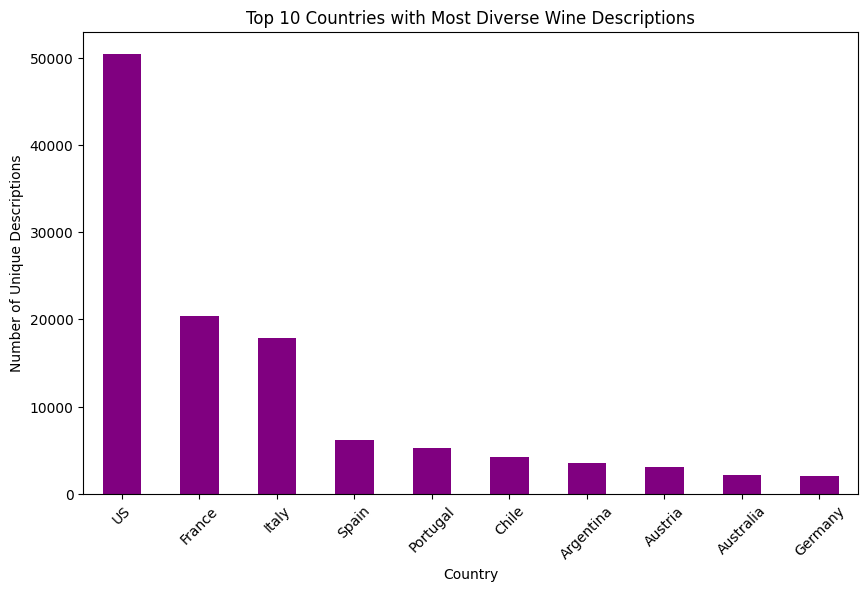

In [8]:
plt.figure(figsize=(10,6))
diversity.plot(kind='bar', color='purple')
plt.title('Top 10 Countries with Most Diverse Wine Descriptions')
plt.ylabel('Number of Unique Descriptions')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

In [9]:
html_content = f"""
<html>
<head><title>WineMag Analysis</title></head>
<body>
<h1>WineMag Dataset Analysis</h1>
<p>Total unique countries: {unique_countries}</p>
<h2>Top 10 Countries with Most Diverse Wine Descriptions</h2>
{diversity.to_frame().to_html()}
</body>
</html>
"""


In [10]:
with open("/content/winemag_report.html", "w") as f:
    f.write(html_content)

print("HTML report saved as 'winemag_report.html'.")

HTML report saved as 'winemag_report.html'.
